In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df=pd.read_csv(r"C:\Users\SAI PRAVEEN YERRA\Downloads\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [71]:
df.shape

(1000, 8)

In [72]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


+ rename race/ethnicity to ethnicity

In [73]:
df.rename(columns={"race/ethnicity": "ethnicity"},inplace=True)
df.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


+ remove spaces in column names


In [74]:
df.columns=df.columns.str.replace(" ","_")
df.columns

Index(['gender', 'ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [75]:
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


+ clean null values if present

In [76]:
df1=df.isna().sum()
df1

gender                         0
ethnicity                      0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

+ explore unique values in catagorical columns

In [77]:
df[['gender','ethnicity','parental_level_of_education','lunch','test_preparation_course']].apply(pd.Series.unique)

gender                                                            [female, male]
ethnicity                          [group B, group C, group A, group D, group E]
parental_level_of_education    [bachelor's degree, some college, master's deg...
lunch                                                   [standard, free/reduced]
test_preparation_course                                        [none, completed]
dtype: object

In [78]:
a =['gender','ethnicity','parental_level_of_education','lunch','test_preparation_course']
df[a].apply(lambda x:x.unique())

gender                                                            [female, male]
ethnicity                          [group B, group C, group A, group D, group E]
parental_level_of_education    [bachelor's degree, some college, master's deg...
lunch                                                   [standard, free/reduced]
test_preparation_course                                        [none, completed]
dtype: object

+ fix dtypes of the columns if needed

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   ethnicity                    1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


+ replace 'none' to 'not completed' in `test preration cource`

In [80]:
df.test_preparation_course.replace('none','not completed',inplace=True)
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,not completed,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,not completed,90,95,93
3,male,group A,associate's degree,free/reduced,not completed,47,57,44
4,male,group C,some college,standard,not completed,76,78,75


+ check duplicate rows

In [81]:
df.duplicated().sum()

0

+ add new column called `division` which gives studet 'first', 'second', 'third' or fail according to total marks.

In [84]:
df["Total_marks"]=df.apply(lambda x : x["math_score"]+x['reading_score']+x['writing_score'],axis=1)
df

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_marks
0,female,group B,bachelor's degree,standard,not completed,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,not completed,90,95,93,278
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,148
4,male,group C,some college,standard,not completed,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,not completed,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [97]:
df['division']=df.Total_marks.apply(lambda x:'first division' 
                                    if x >=180 else ('Second Division' if 150<=x>=179 else('Third Divison' if 90>=x<=149 else "Fail")))
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_marks,division
0,female,group B,bachelor's degree,standard,not completed,72,72,74,218,first division
1,female,group C,some college,standard,completed,69,90,88,247,first division
2,female,group B,master's degree,standard,not completed,90,95,93,278,first division
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,148,Fail
4,male,group C,some college,standard,not completed,76,78,75,229,first division


### EDA
+ Average marks of a student in all 3 subjects.

In [104]:
df['Avg']=df.Total_marks.apply(lambda x:x/3)
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_marks,division,Avg
0,female,group B,bachelor's degree,standard,not completed,72,72,74,218,first division,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,first division,82.333333
2,female,group B,master's degree,standard,not completed,90,95,93,278,first division,92.666667
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,148,Fail,49.333333
4,male,group C,some college,standard,not completed,76,78,75,229,first division,76.333333


+ Which student got the highest marks in total?`

In [113]:
df.loc[df['Total_marks'].idxmax()]

gender                                    female
ethnicity                                group E
parental_level_of_education    bachelor's degree
lunch                                   standard
test_preparation_course            not completed
math_score                                   100
reading_score                                100
writing_score                                100
Total_marks                                  300
division                          first division
Avg                                        100.0
Name: 458, dtype: object

+ which student got the lowest marks in total?

In [114]:
df.loc[df['Total_marks'].idxmin()]

gender                                   female
ethnicity                               group C
parental_level_of_education    some high school
lunch                              free/reduced
test_preparation_course           not completed
math_score                                    0
reading_score                                17
writing_score                                10
Total_marks                                  27
division                          Third Divison
Avg                                         9.0
Name: 59, dtype: object

+ What is the average score of students in each subjects? hint: #make box plot of each subject

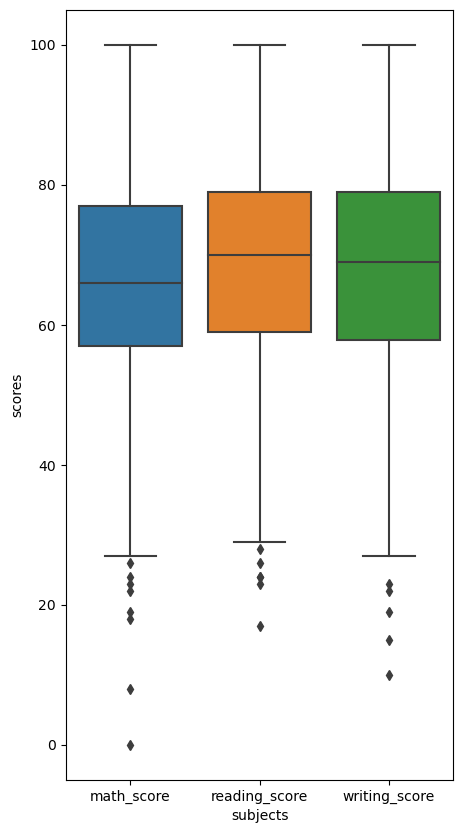

In [130]:
#pd.melt(Frame="data_Name",value_vars="values on x-axis",var_name="name of x-axis",value_name="name of y-axis")
plot= pd.melt(frame = df, value_vars=['math_score','reading_score', 'writing_score'], var_name= 'subjects', value_name= 'scores')
plot
plt.figure(figsize= (5,10))
sns.boxplot(x = plot.subjects, y = plot.scores)
plt.show()

+ Ratio of Male and Female students. hint: #pie chart

In [142]:
sex=df.gender.value_counts()
sex

female    518
male      482
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x246233164f0>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'female'),
  Text(0.06217041096298411, -1.0982417038160106, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.80%'),
  Text(0.033911133252536786, -0.5990409293541875, '48.20%')])

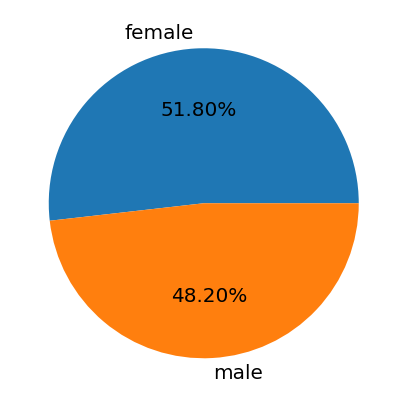

In [143]:
plt.figure(figsize=(5,10))
plt.pie(x=sex,labels = sex.index, autopct = "%0.2f%%", textprops = {'size': 'x-large'})

+  Ratio of ethnicity of students. hint: # pie chart

In [144]:
group=df.ethnicity.value_counts()
group

group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64

([<matplotlib.patches.Wedge at 0x246233685e0>,
 [Text(0.592324332246979, 0.9269044640242977, 'group C'),
  Text(-1.0461621742897658, 0.3399186742226879, 'group D'),
  Text(-0.49322154359063347, -0.9832255636109514, 'group B'),
  Text(0.5952333666001212, -0.9250390474384775, 'group E'),
  Text(1.057281962489778, -0.3035701760610943, 'group A')],
 [Text(0.3230859994074431, 0.5055842531041623, '31.90%'),
  Text(-0.5706339132489631, 0.18541018593964795, '26.20%'),
  Text(-0.2690299328676182, -0.5363048528787007, '19.00%'),
  Text(0.32467274541824787, -0.5045667531482604, '14.00%'),
  Text(0.5766992522671516, -0.1655837323969605, '8.90%')])

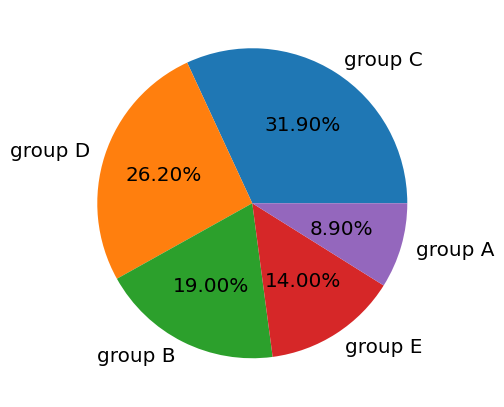

In [151]:
plt.figure(figsize=(5,10))
plt.pie(x=group,labels=group.index,autopct = "%0.2f%%", textprops = {'size': 'x-large'})

+ On an average which group performed the best in total marks? hint: group by then pivot table (col = gen, index= eth, val = total)

In [153]:
Pivot_Table=df.pivot_table(index="ethnicity", columns="gender", values="Total_marks", aggfunc="mean")
Pivot_Table

gender,female,male
ethnicity,,
group A,195.388889,184.622642
group B,202.528846,189.000000
group C,205.755556,195.748201
group D,214.317829,200.962406
group E,222.188406,214.436620


+ Which gender perfomed better overall? hint: #bar plot

<AxesSubplot:xlabel='gender', ylabel='Total_marks'>

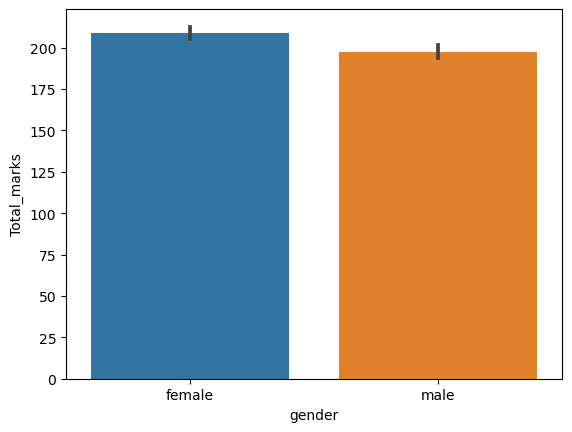

In [156]:
sns.barplot(data=df,x='gender',y='Total_marks')

+ Which gender performed better in each group?  hint: #bar

<AxesSubplot:xlabel='ethnicity', ylabel='Total_marks'>

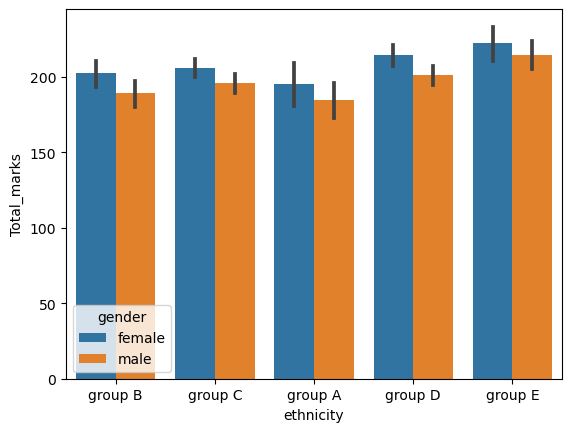

In [158]:
sns.barplot(data=df,x='ethnicity',y='Total_marks',hue='gender')

+ How many students have failed and which group have the most? 

In [162]:
a= df[df.division == 'Fail']
print(a.ethnicity.value_counts())

group C    93
group D    63
group B    53
group A    38
group E    23
Name: ethnicity, dtype: int64


+  Students got more marks than others whose parents have higer education degree?

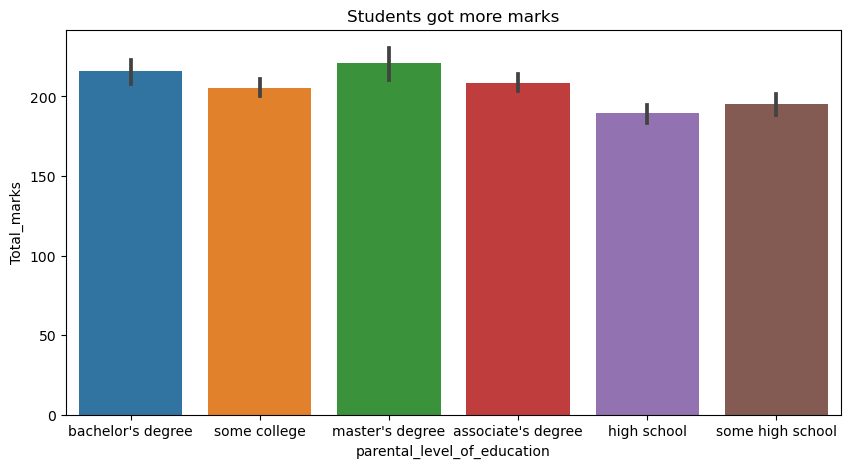

In [167]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="parental_level_of_education",y='Total_marks')
plt.title("Students got more marks")
plt.show()

+ Those students whose completed their course got more grades in compare to those student who didn't?

In [168]:
df.test_preparation_course.value_counts()

not completed    642
completed        358
Name: test_preparation_course, dtype: int64